In [40]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [41]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [42]:
data_dir

'.\\datasets\\flower_photos'

In [44]:
from pathlib import Path
list(Path(data_dir).glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [47]:

image_count = len(list(Path(data_dir).glob('*/*.jpg')))
print(image_count)

3670


In [49]:
roses = list(Path(data_dir).glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

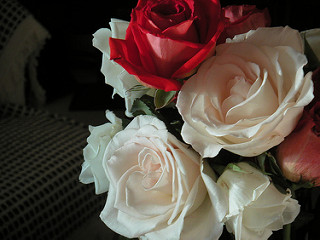

In [50]:

PIL.Image.open(str(roses[1]))

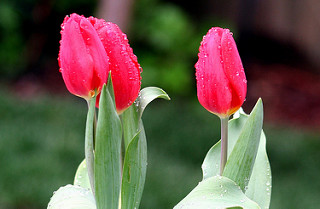

In [52]:


PIL.Image.open(str(tulips[0]))

In [54]:
flowers_images_dict = {
    'roses': list(Path(data_dir).glob('roses/*')),
    'daisy': list(Path(data_dir).glob('daisy/*')),
    'dandelion': list(Path(data_dir).glob('dandelion/*')),
    'sunflowers': list(Path(data_dir).glob('sunflowers/*')),
    'tulips': list(Path(data_dir).glob('tulips/*')),
}

In [55]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [56]:

flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [57]:

str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [58]:

img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [59]:

img.shape

(240, 179, 3)

In [60]:

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [61]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [62]:

X = np.array(X)
y = np.array(y)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [64]:

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [65]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)     

Epoch 1/30
86/86 [==============================] - 6s 38ms/step - loss: 1.2392 - accuracy: 0.4644
Epoch 2/30
86/86 [==============================] - 6s 38ms/step - loss: 1.2392 - accuracy: 0.4644
Epoch 2/30
86/86 [==============================] - 3s 34ms/step - loss: 0.9499 - accuracy: 0.6424
Epoch 3/30
86/86 [==============================] - 3s 34ms/step - loss: 0.9499 - accuracy: 0.6424
Epoch 3/30
86/86 [==============================] - 3s 34ms/step - loss: 0.7878 - accuracy: 0.7017
Epoch 4/30
86/86 [==============================] - 3s 34ms/step - loss: 0.7878 - accuracy: 0.7017
Epoch 4/30
86/86 [==============================] - 3s 38ms/step - loss: 0.5887 - accuracy: 0.7809
Epoch 5/30
86/86 [==============================] - 3s 38ms/step - loss: 0.5887 - accuracy: 0.7809
Epoch 5/30
86/86 [==============================] - 3s 33ms/step - loss: 0.3885 - accuracy: 0.8612
Epoch 6/30
86/86 [==============================] - 3s 33ms/step - loss: 0.3885 - accuracy: 0.8612
Epoch 6/30

In [66]:

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 46ms/step - loss: 2.0833 - accuracy: 0.6743


[2.08333420753479, 0.6742919683456421]

In [67]:

predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 3s 71ms/step


array([[  2.7707794 ,  22.825867  ,  -4.5433726 ,  -9.940816  ,
         -1.81507   ],
       [ 12.586144  ,   2.9481041 ,  -8.510632  ,  -9.578719  ,
          6.241626  ],
       [ -1.5804087 ,   0.63750476,   9.235255  , -13.03671   ,
         -6.2388544 ],
       ...,
       [  5.8879867 ,  -5.0206814 ,  -6.083816  ,  13.839883  ,
          8.541694  ],
       [  4.6767306 ,   2.6600797 ,   6.1603646 ,  -3.7272031 ,
         -5.3557625 ],
       [  2.2511914 , -14.350335  ,   3.7341034 ,  12.667374  ,
          6.5416574 ]], dtype=float32)

In [68]:
score = tf.nn.softmax(predictions[0])

In [69]:

np.argmax(score)

1

In [70]:

y_test[0]

1

In [71]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

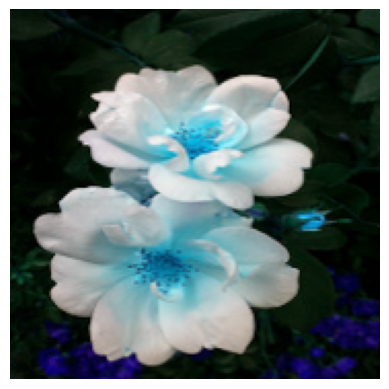

In [72]:

plt.axis('off')
plt.imshow(X[0])

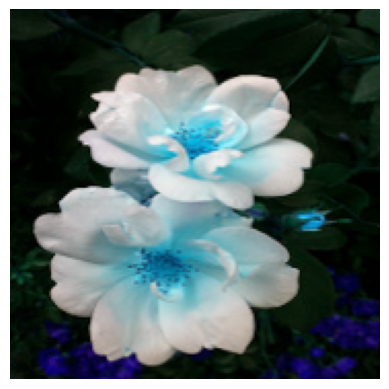

In [74]:
plt.axis('off')
# Apply data augmentation to a single image instead of the entire array
single_image = tf.expand_dims(X[0], 0)  # Add batch dimension
augmented_image = data_augmentation(single_image)
plt.imshow(augmented_image[0].numpy().astype("uint8"))

In [75]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 28s 275ms/step - loss: 1.3093 - accuracy: 0.4480
Epoch 2/30
86/86 [==============================] - 28s 275ms/step - loss: 1.3093 - accuracy: 0.4480
Epoch 2/30
86/86 [==============================] - 23s 266ms/step - loss: 1.0536 - accuracy: 0.5825
Epoch 3/30
86/86 [==============================] - 23s 266ms/step - loss: 1.0536 - accuracy: 0.5825
Epoch 3/30
86/86 [==============================] - 23s 264ms/step - loss: 0.9256 - accuracy: 0.6344
Epoch 4/30
86/86 [==============================] - 23s 264ms/step - loss: 0.9256 - accuracy: 0.6344
Epoch 4/30
86/86 [==============================] - 23s 270ms/step - loss: 0.8524 - accuracy: 0.6690
Epoch 5/30
86/86 [==============================] - 23s 270ms/step - loss: 0.8524 - accuracy: 0.6690
Epoch 5/30
86/86 [==============================] - 23s 266ms/step - loss: 0.7885 - accuracy: 0.6948
Epoch 6/30
86/86 [==============================] - 23s 266ms/step - loss: 0.7885 - accurac

In [76]:

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 25ms/step - loss: 1.1663 - accuracy: 0.7211


[1.1663436889648438, 0.7211328744888306]